In [1]:
from ml_p2.regression.logistic_regression import LogisticRegression
from ml_p2.regression.logistic_regression.logistic_regression import SklearnWrapper
from ml_p2.regression.logistic_regression.logistic_regression import SklearnLogisticRegression
from ml_p2.regression.logistic_regression.logistic_regression import PolynomialFeatures
from ml_p2.regression.logistic_regression.logistic_regression import load_classification_data
from ml_p2.visualization.classification_plots import plot_accuracy_heatmap

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p2\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Metrics:
--------------------------------------------------
Custom Logistic Regression Training Score: 0.7375
Custom Logistic Regression Test Score:     0.7500
Sklearn Logistic Regression Training Score: 0.7125
Sklearn Logistic Regression Test Score:     0.8000
--------------------------------------------------


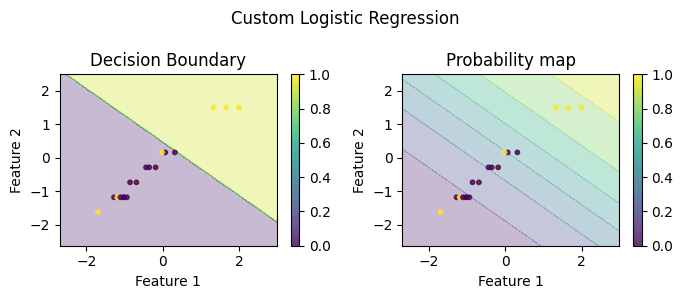

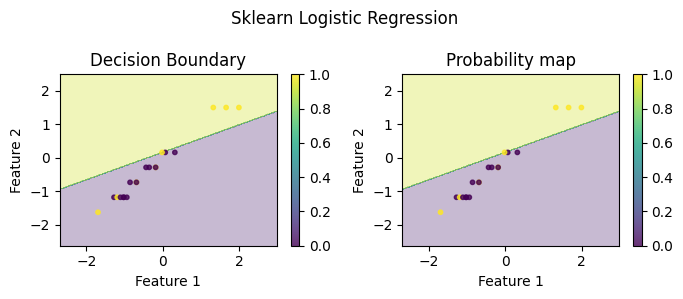

In [20]:
from ml_p2.visualization.classification_plots import plot_classification_results


X_train, X_test, y_train, y_test, _, _ = load_classification_data(r"..\tests\data\chddata.csv")
degree = 1

poly = PolynomialFeatures(degree=degree, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression(learning_rate=1, lambda_=0.01, degree=degree)
log_reg.fit(X_train, y_train)

sk_log_reg = SklearnLogisticRegression(penalty='l2', C=1/0.1)  # C=1/lambda
sk_log_reg.fit(X_train_poly, y_train)

sk_wrapper = SklearnWrapper(sk_log_reg, poly)

# Performance metrics
print("Performance Metrics:")
print("-" * 50)
print(f"Custom Logistic Regression Training Score: {log_reg.score(X_train, y_train):.4f}")
print(f"Custom Logistic Regression Test Score:     {log_reg.score(X_test, y_test):.4f}")
print(f"Sklearn Logistic Regression Training Score: {sk_log_reg.score(X_train_poly, y_train):.4f}")
print(f"Sklearn Logistic Regression Test Score:     {sk_log_reg.score(X_test_poly, y_test):.4f}")
print("-" * 50)
plot_classification_results(log_reg, X_test, y_test, "Custom Logistic Regression")
plot_classification_results(sk_wrapper, X_test, y_test, "Sklearn Logistic Regression")

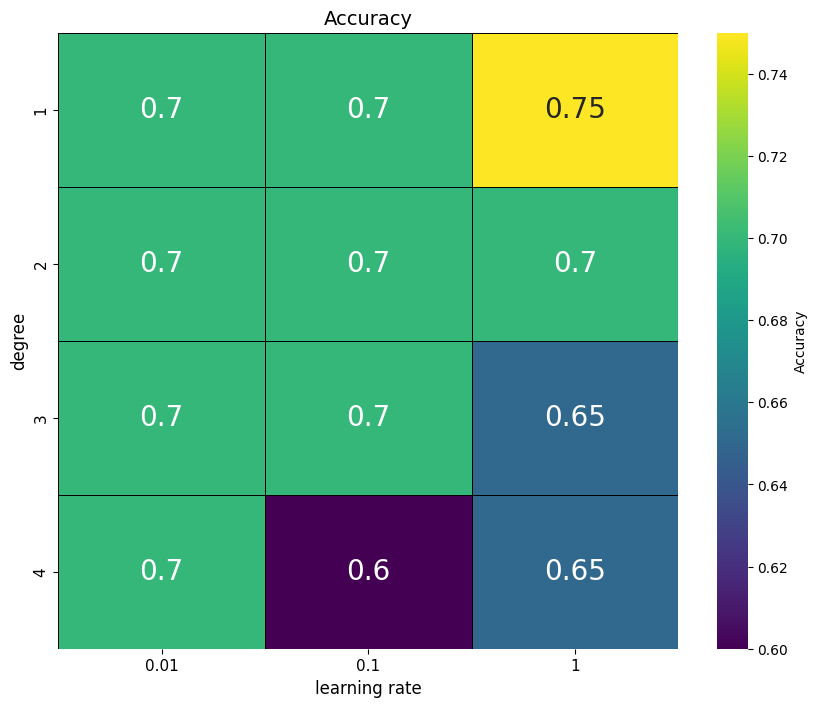

In [8]:
from ml_p2.visualization.classification_plots import plot_accuracy_heatmap
learning_rates = [0.01, 0.1, 1]
# lambdas = [0.01, 0.1, 1]
degrees = [1, 2, 3, 4]
scores = []
params = {
    "learning_rate": learning_rates,
    # "lambda_": lambdas,
    "degree": degrees
}

for degree in degrees:
    for learning_rate in learning_rates:
        log_reg = LogisticRegression(degree=degree, learning_rate=learning_rate)
        log_reg.fit(X_train, y_train)
        scores.append(log_reg.score(X_test, y_test))
        # print(f"degree: {degree}, learning_rate: {learning_rate}, score: {scores[-1]}")

plot_accuracy_heatmap(scores, degrees, learning_rates, "degree", "learning rate", "Accuracy")



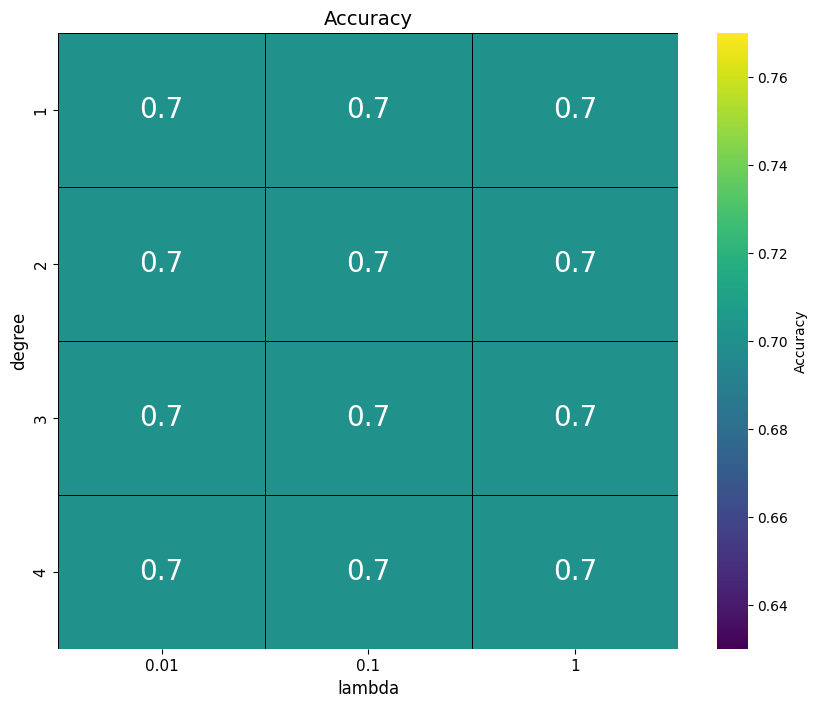

In [10]:
learning_rates = [0.01, 0.1, 1]
lambdas = [0.01, 0.1, 1]
degrees = [1, 2, 3,4]
scores = []
params = {
    # "learning_rate": learning_rates,
    "lambda_": lambdas,
    "degree": degrees
}

for degree in degrees:
    for lambda_ in lambdas:
        log_reg = LogisticRegression(degree=degree, lambda_=lambda_)
        log_reg.fit(X_train, y_train)
        scores.append(log_reg.score(X_test, y_test))

plot_accuracy_heatmap(scores, degrees, lambdas, "degree", "lambda", "Accuracy")